In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [2]:
df = pd.read_csv('../原始数据集/exchange_rate.csv')
df.head(2)

,date,0,1,2,3,4,5,6,OT
0,1/1/1990 0:00,0.7855,1.611,0.861698,0.634196,0.211242,0.006838,0.525486,0.593
1,1/2/1990 0:00,0.7818,1.610,0.861104,0.633513,0.211242,0.006863,0.523972,0.594


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7588 non-null   object 
 1   0       7588 non-null   float64
 2   1       7588 non-null   float64
 3   2       7588 non-null   float64
 4   3       7588 non-null   float64
 5   4       7588 non-null   float64
 6   5       7588 non-null   float64
 7   6       7588 non-null   float64
 8   OT      7588 non-null   float64
dtypes: float64(8), object(1)
memory usage: 533.7+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.describe()

,date,0,1,2,3,4,5,6,OT
count,7588,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,2000-05-21 12:00:00,0.776974,1.634105,0.821811,0.848146,0.142833,0.009343,0.669673,0.654418
min,1990-01-01 00:00:00,0.483297,1.211534,0.618582,0.548617,0.109292,0.006254,0.523834,0.393153
25%,1995-03-12 18:00:00,0.701422,1.532887,0.727901,0.696864,0.120814,0.008331,0.593287,0.566000
50%,2000-05-21 12:00:00,0.761377,1.606574,0.811582,0.813959,0.145212,0.009151,0.662767,0.669187
75%,2005-07-31 06:00:00,0.873477,1.707646,0.920394,1.014018,0.159948,0.009995,0.731835,0.734901
max,2010-10-10 00:00:00,1.102536,2.109000,1.091524,1.374079,0.237954,0.013202,0.832556,0.882379
std,NaN,0.136620,0.161544,0.117123,0.168874,0.023996,0.001458,0.082836,0.115292


均值为：0.654，标准差为：0.115
KstestResult(statistic=0.05118877749801648, pvalue=1.015502265986177e-17, statistic_location=0.669098, statistic_sign=-1)
异常值共0条


(-10.0, 8000.0)

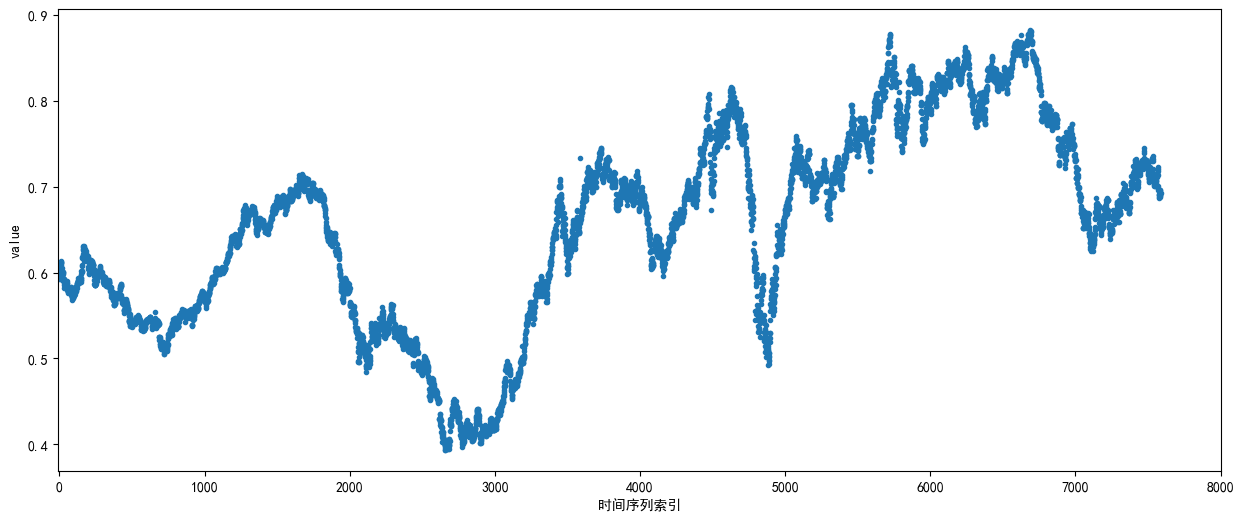

In [6]:
import numpy as np
from scipy import stats


mean = df['OT'].mean()  # 计算均值

std = df['OT'].std()  # 计算标准差

print('均值为：%.3f，标准差为：%.3f' % (mean, std))
print(stats.kstest(df['OT'], 'norm', (mean, std)))


fig, ax = plt.subplots(figsize=(15, 6))

# df['OT'].plot(kind='kde', grid=True, style='-k', title='ETTh1', ax=ax1)

error = df['OT'][np.abs(df['OT'] - mean) > 3 * std]

data_c = df['OT'][np.abs(df['OT'] - mean) <= 3 * std]

print('异常值共%i条' % len(error))

# 筛选出异常值error、剔除异常值之后的数据data_c
plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.scatter(data_c.index, data_c, marker='.', alpha=1, label='正常值')

ax.scatter(error.index, error, marker='.', alpha=1, label='异常值')
ax.set_xlabel('时间序列索引')
ax.set_ylabel('value')
ax.set_xlim([-10, 8000])



In [7]:
data = pd.DataFrame(data_c)
error = pd.DataFrame(error)
data.to_csv('output/rate_normal.csv')
error.to_csv('output/rate_error.csv')